In [1]:
!pip install selenium

In [2]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [5]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [6]:
#opening the flipkart page on automated chrome browser
driver.get('https://www.amazon.com/')

In [9]:
# entering product name guitar

product=driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]')
product.send_keys('guitar')

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x00CFF243]
	(No symbol) [0x00C87FD1]
	(No symbol) [0x00B7CF10]
	(No symbol) [0x00BA795E]
	(No symbol) [0x00BA70E5]
	(No symbol) [0x00BC858C]
	(No symbol) [0x00BA2BFF]
	(No symbol) [0x00BC8804]
	(No symbol) [0x00BDC9EB]
	(No symbol) [0x00BC8386]
	(No symbol) [0x00BA163C]
	(No symbol) [0x00BA269D]
	GetHandleVerifier [0x00F99A22+2655074]
	GetHandleVerifier [0x00F8CA24+2601828]
	GetHandleVerifier [0x00DA8C0A+619850]
	GetHandleVerifier [0x00DA7830+614768]
	(No symbol) [0x00C905FC]
	(No symbol) [0x00C95968]
	(No symbol) [0x00C95A55]
	(No symbol) [0x00CA051B]
	BaseThreadInitThunk [0x76BB00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77847BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77847B8E+238]


In [11]:
# Exception Handling
try:
    product=driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]')
    product.send_keys('guitar')
except ElementNotInteractableException as e:
    print("Exception Raised ", e)
    product=driver.find_element(By.XPATH, '//div[@class="s-suggestion-container"]')
    driver.get(product.get_attribute('href'))

Exception Raised  Message: element not interactable
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x00CFF243]
	(No symbol) [0x00C87FD1]
	(No symbol) [0x00B7CF10]
	(No symbol) [0x00BA795E]
	(No symbol) [0x00BA70E5]
	(No symbol) [0x00BC858C]
	(No symbol) [0x00BA2BFF]
	(No symbol) [0x00BC8804]
	(No symbol) [0x00BDC9EB]
	(No symbol) [0x00BC8386]
	(No symbol) [0x00BA163C]
	(No symbol) [0x00BA269D]
	GetHandleVerifier [0x00F99A22+2655074]
	GetHandleVerifier [0x00F8CA24+2601828]
	GetHandleVerifier [0x00DA8C0A+619850]
	GetHandleVerifier [0x00DA7830+614768]
	(No symbol) [0x00C905FC]
	(No symbol) [0x00C95968]
	(No symbol) [0x00C95A55]
	(No symbol) [0x00CA051B]
	BaseThreadInitThunk [0x76BB00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77847BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77847B8E+238]



InvalidArgumentException: Message: invalid argument: 'url' must be a string
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x00CFF243]
	(No symbol) [0x00C87FD1]
	(No symbol) [0x00B7D04D]
	(No symbol) [0x00BDD23F]
	(No symbol) [0x00BC858C]
	(No symbol) [0x00BDC9EB]
	(No symbol) [0x00BC8386]
	(No symbol) [0x00BA163C]
	(No symbol) [0x00BA269D]
	GetHandleVerifier [0x00F99A22+2655074]
	GetHandleVerifier [0x00F8CA24+2601828]
	GetHandleVerifier [0x00DA8C0A+619850]
	GetHandleVerifier [0x00DA7830+614768]
	(No symbol) [0x00C905FC]
	(No symbol) [0x00C95968]
	(No symbol) [0x00C95A55]
	(No symbol) [0x00CA051B]
	BaseThreadInitThunk [0x76BB00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77847BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77847B8E+238]


# QUES 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


In [1]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [3]:
#opening the amazon page on automated chrome browser
driver.get('https://www.amazon.in/')

In [4]:
# entering product name shoes

product1=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
product1.send_keys('shoes')

In [5]:
# entering search button

search=driver.find_element(By.CLASS_NAME, 'nav-right')
search.click()

In [6]:
# fetching url to open each link
Shoes_url=[]
start=0
end=2
for page in range(start,end):
    url=driver.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        Shoes_url.append(i.get_attribute('href'))


Shoes_url
        

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4Mjg4NjQyNTA4ODI4MjAxOjE2NzQ2NzUyNTQ6c3BfYXRmOjIwMTA4OTI0NTIwMjk4OjowOjo&url=%2FCampus-Barley-BLU-Wine-Running-Shoes%2Fdp%2FB0855ZKVKS%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1FZU0OZVSQCZI%26keywords%3Dshoes%26qid%3D1674675254%26sprefix%3Dshoes%252Caps%252C633%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4Mjg4NjQyNTA4ODI4MjAxOjE2NzQ2NzUyNTQ6c3BfYXRmOjIwMTA4OTI0NTIyNzk4OjowOjo&url=%2FCampus-Belgium-Running-Shoes-10-UK%2Fdp%2FB09PRGBHNB%2Fref%3Dsr_1_2_sspa%3Fcrid%3D1FZU0OZVSQCZI%26keywords%3Dshoes%26qid%3D1674675254%26sprefix%3Dshoes%252Caps%252C633%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4Mjg4NjQyNTA4ODI4MjAxOjE2NzQ2NzUyNTQ6c3BfYXRmOjIwMTAwNTExNzkzMjk4OjowOjo&url=%2FCollection-Outdoor-Walking-Running-Numeric_9%2Fdp%2FB0BH517FTR%2Fref%3Dsr_1_3_sspa%3Fcrid%3D1FZU0OZVSQCZI%26keywords%3Dshoes%26qid%3D1674675254%

In [7]:
# scrapping Brand Name for the shoes

Brand=[]

start=0
end=3
for page in range(start,end):
    Brand_Name=driver.find_elements(By.XPATH, '//span[@class="a-size-base-plus a-color-base"]')
    for i in Brand_Name:
        Brand.append(i.text)

Brand

['Campus',
 'Campus',
 'Generic',
 'Campus',
 'Campus',
 'ASIAN',
 'Campus',
 'Avant',
 'Sparx',
 'Sparx',
 'Campus',
 'Sparx',
 'Sparx',
 'WORLD WEAR FOOTWEAR',
 'Campus',
 'Puma',
 'Puma',
 'Puma',
 '',
 '',
 'Sparx',
 'ZOVIM',
 '',
 'Adidas',
 'Campus',
 'Campus',
 'Campus',
 'Bourge',
 'Amico',
 'Campus',
 'aadi',
 'Campus',
 'aadi',
 'Sparx',
 'Sparx',
 'Reebok',
 'Sparx',
 'Campus',
 'Bourge',
 'Campus',
 'Campus',
 'Sparx',
 'ASIAN',
 'Campus',
 'Sparx',
 'Campus',
 'Sparx',
 'Campus',
 'Sparx',
 'Campus',
 'Campus',
 'ASIAN',
 'ASIAN',
 'ASIAN',
 'Adidas',
 'Bourge',
 'aadi',
 'Sparx',
 'Campus',
 'Campus',
 'Sparx',
 'Adidas',
 'ASIAN',
 'Adidas',
 'Adidas',
 'Generic',
 'Generic',
 'aadi',
 'Adidas',
 'Avant',
 'Campus',
 'Campus',
 'Generic',
 'Campus',
 'Campus',
 'ASIAN',
 'Campus',
 'Avant',
 'Sparx',
 'Sparx',
 'Campus',
 'Sparx',
 'Sparx',
 'WORLD WEAR FOOTWEAR',
 'Campus',
 'Puma',
 'Puma',
 'Puma',
 '',
 '',
 'Sparx',
 'ZOVIM',
 '',
 'Adidas',
 'Campus',
 'Campus',
 '

In [9]:
# scrapping name of the product
Name=[]

start=0
end=3
for page in range(start,end):
    ProductName=driver.find_elements(By.XPATH, '//span[@class="a-size-base-plus a-color-base a-text-normal"]')
    for i in ProductName:
        Name.append(i.text)

Name

["Men's Barley Running Shoes",
 "Men's Belgium Plus Running Shoes",
 "MAHIRA Mes's Casual Outdoor Walking Sports Running Shoes for Mens Boys.",
 "Men's Running Shoes",
 "Men's OXYFIT (N) Walking Shoe",
 "Men's Wonder-13 Sports Running Shoes",
 "Men's Maxico Running Shoes",
 "Men's Ultra Light Running and Training Shoes",
 'Men Running Shoes',
 "Men's Sm-675 Running Shoe",
 "Men's Everest Running Shoes",
 'Mens Sx0680g Sneaker',
 'Mens Sx0677g Running Shoe',
 "Men's Sport Sneakers Shoes",
 "Men's Trophy Running Shoes",
 'Mens Maximal Comfort-everglide Range Walking Shoe',
 'Mens Ultimate Ease - Everglide Range Walking Shoe',
 'Mens Wish Running Shoe',
 '',
 '',
 'Mens Sd0323g Sneakers',
 "Men's Casual Shoes",
 '',
 "Men's Adivat M Running Shoes",
 "Men's Rodeo-2 Running Shoes",
 'Mens Ignite Pro Running Shoes',
 "Men's Crysta Running Shoes",
 "Men's Loire-z126 Running Shoes",
 "Men's & Boys Multicolor Running Casual Sports Shoes",
 "Men's Maxico Running Shoes",
 "Men's Black Mesh Outdoo

In [11]:
# scrapping price of the product

price=[]

start=0
end=3
for page in range(start,end):
    Productprice=driver.find_elements(By.XPATH, '//span[@class="a-price-whole"]')
    for i in Productprice:
        price.append(i.text)

price

['816',
 '1,019',
 '419',
 '503',
 '669',
 '499',
 '974',
 '584',
 '936',
 '865',
 '869',
 '1,245',
 '901',
 '309',
 '869',
 '1,499',
 '1,979',
 '',
 '',
 '741',
 '549',
 '',
 '1,161',
 '753',
 '604',
 '672',
 '531',
 '539',
 '999',
 '339',
 '999',
 '299',
 '958',
 '933',
 '1,499',
 '807',
 '521',
 '699',
 '1,019',
 '1,047',
 '1,382',
 '799',
 '1,299',
 '1,359',
 '1,299',
 '1,338',
 '1,124',
 '1,299',
 '916',
 '688',
 '1,249',
 '549',
 '524',
 '1,249',
 '649',
 '299',
 '1,162',
 '593',
 '1,119',
 '824',
 '1,260',
 '549',
 '2,299',
 '1,934',
 '777',
 '399',
 '999',
 '1,161',
 '649',
 '816',
 '1,019',
 '419',
 '503',
 '669',
 '499',
 '974',
 '584',
 '936',
 '865',
 '869',
 '1,245',
 '901',
 '309',
 '869',
 '1,499',
 '1,979',
 '',
 '',
 '741',
 '549',
 '',
 '1,161',
 '753',
 '604',
 '672',
 '531',
 '539',
 '999',
 '339',
 '999',
 '299',
 '958',
 '933',
 '1,499',
 '807',
 '521',
 '699',
 '1,019',
 '1,047',
 '1,382',
 '799',
 '1,299',
 '1,359',
 '1,299',
 '1,338',
 '1,124',
 '1,299',
 '916'

In [16]:
print(len(Shoes_url), len(Brand[0:140]), len(Name[0:140]), len(price[0:140]))

140 140 140 140


In [19]:
# creating Data Frame for sneakers

df=pd.DataFrame({'Shoes URL':Shoes_url[0:140], 'Brand Name':Brand[0:140], 'Name of the product':Name[0:140], 'Price':price[0:140]})
df

,Shoes URL,Brand Name,Name of the product,Price
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Campus,Men's Barley Running Shoes,816
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Campus,Men's Belgium Plus Running Shoes,"1,019"
2,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Generic,MAHIRA Mes's Casual Outdoor Walking Sports Run...,419
3,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Campus,Men's Running Shoes,503
4,https://www.amazon.in/Campus-OXYFIT-Walking-Sh...,Campus,Men's OXYFIT (N) Walking Shoe,669
...,...,...,...,...
135,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Generic,Running Walking Shoes for Men Sports Shoes,999
136,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Generic,Bhanu Enterprises | Men's and Boy's Sports - L...,"1,161"
137,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,aadi,Men's Black Mesh Running Sport Shoes,649
138,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Adidas,Men's Adivat M Running Shoes,816


# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [20]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [21]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [22]:
#opening the google page on automated chrome browser
driver.get('https://images.google.com/')

In [24]:
# entering product name Fruits

product=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
product.send_keys('fruits')

In [25]:
# entering search button

search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
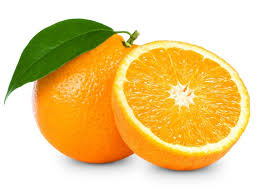
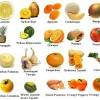
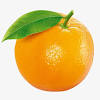
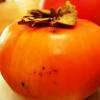
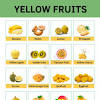
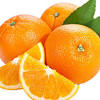
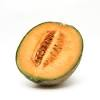
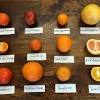
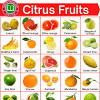
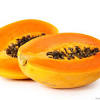

In [32]:
# scrapping 10 images of fruits

Fruits =[]
Fruit_images=driver.find_elements(By.XPATH, '//img[@class="rHLoR"]')
for i in Fruit_images[0:10]:
    Fruits.append(i.get_attribute('src'))
    
Fruits

In [35]:
# entering product name Cars

product=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
product.send_keys('Cars')

In [36]:
# entering search button

search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
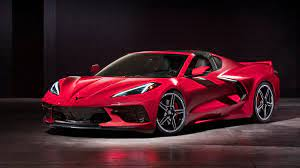
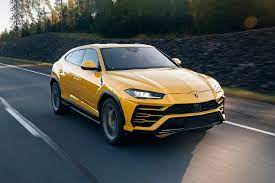
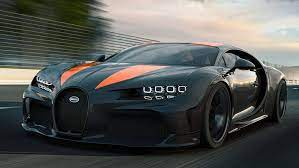
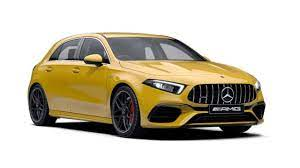
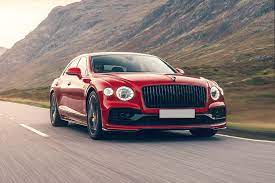
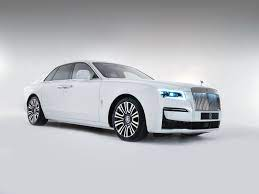
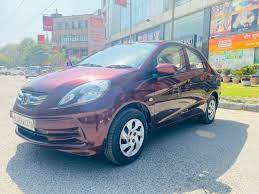
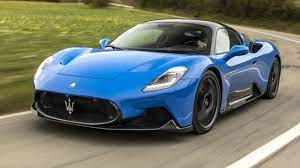
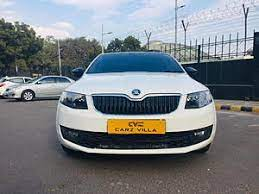
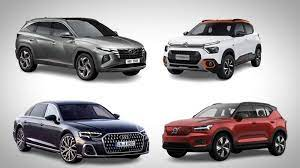

In [37]:
# scrapping 10 images of cars

Cars =[]
Cars_images=driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')
for i in Cars_images[0:10]:
    Cars.append(i.get_attribute('src'))
    
Cars

In [45]:
# entering product name Machine Learning
machine=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
machine.send_keys('machine learning')

In [46]:
# entering search button

search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
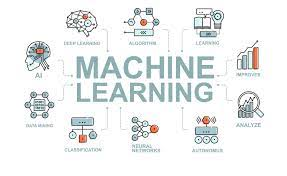
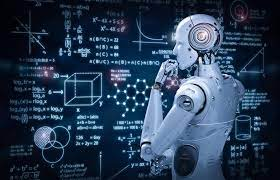
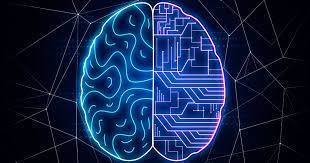
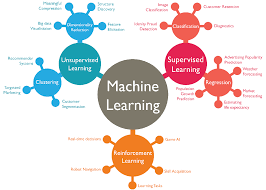
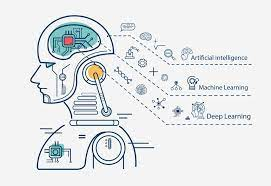
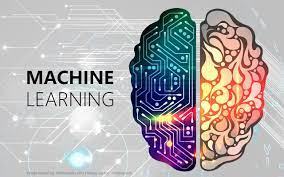
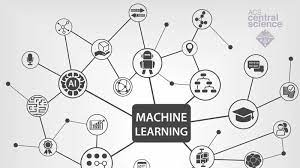
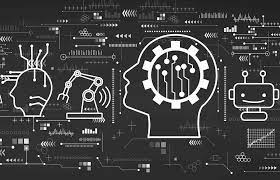
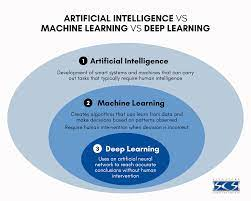
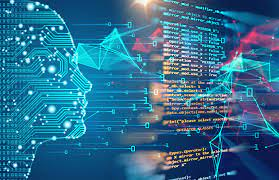

In [47]:
# scrapping 10 images of Machine Learning

Machine =[]
Machine_images=driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')
for i in Machine_images[0:10]:
    Machine.append(i.get_attribute('src'))
    
Machine

In [49]:
# entering product name Guitar
Guitar=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
Guitar.send_keys('Guitar')

In [50]:
# entering search button

search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
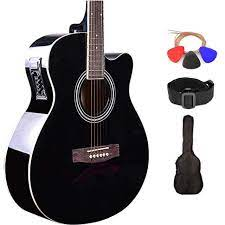
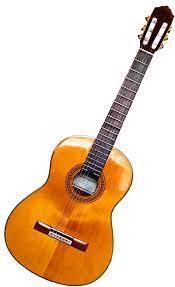
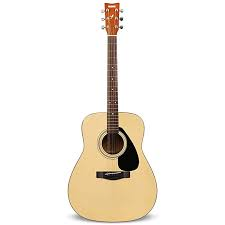
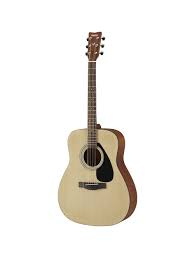
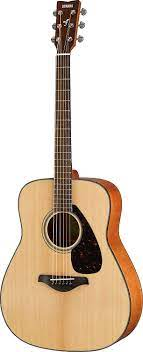
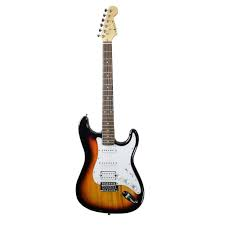
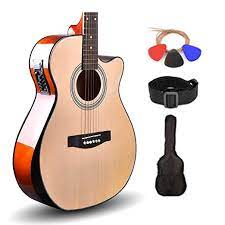
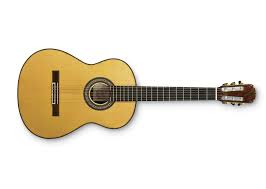
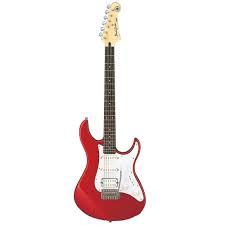
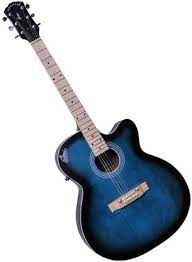

In [51]:
# scrapping 10 images of Guitar

Guitar =[]
Guitar_images=driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')
for i in Guitar_images[0:10]:
    Guitar.append(i.get_attribute('src'))
    
Guitar

In [52]:
# entering product name Cakes
Cakes=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
Cakes.send_keys('Cakes')

In [53]:
# entering search button

search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
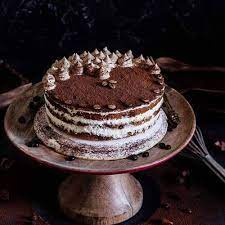
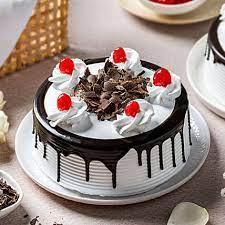
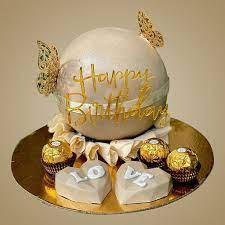
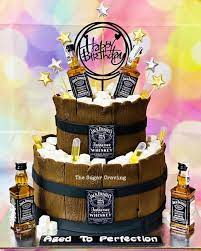
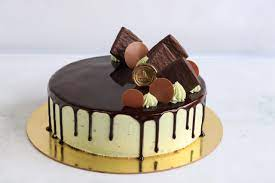
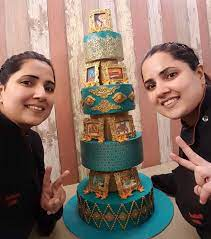
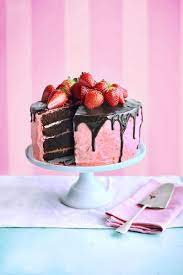
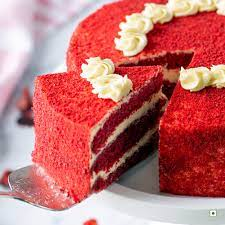
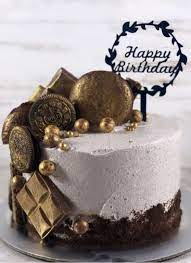
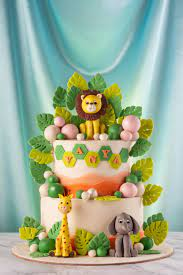

In [54]:
# scrapping 10 images of Cakes

Cakes =[]
Cakes_images=driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')
for i in Cakes_images[0:10]:
    Cakes.append(i.get_attribute('src'))
    
Cakes

# QUES 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [55]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [56]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [57]:
#opening the digit.in on automated chrome browser
driver.get('https://www.digit.in/')

In [59]:
# opening gaming page

Gaming=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[5]/a')
Gaming.click()

In [60]:
# opening best gaming laptops page

laptops=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[5]/div[3]/div/div[2]/div/ul[3]/li[4]/a')
laptops.click()

In [61]:
# Entering Product Name tag

Product_Name=[]
Product=driver.find_elements(By.XPATH,'//h3[@class="ga-fired"]')
for i in Product:
    Product_Name.append(i.text)

Product_Name

['01. Alienware x17 R2',
 '02. Alienware x15 R2',
 '03. Alienware m15 R7',
 '04. Dell G15 (Intel Core i7-12700H)',
 '05. Dell G15 (AMD Ryzen 7 6800H)',
 '06. Dell G15 (Intel Core i5-11260H)']

In [63]:
# Entering price tag

Price=[]
Price_tag=driver.find_elements(By.XPATH,'//span[@class="price"]')
for i in Price_tag:
    Price.append(i.text)

Price

['₹ 389990',
 '₹ 389990',
 '₹ 212430',
 '₹ 119199',
 '₹ 124500',
 '₹ 124890',
 '₹ 149595',
 '₹ 72490']

In [70]:
print(len(Product_Name), len(Price[0:6]))

6 6


In [73]:
# creating Data Frame for Gaming

df=pd.DataFrame({'Product Name':Product_Name, 'Prices':Price[0:6]})
df

,Product Name,Prices
0,01. Alienware x17 R2,₹ 389990
1,02. Alienware x15 R2,₹ 389990
2,03. Alienware m15 R7,₹ 212430
3,04. Dell G15 (Intel Core i7-12700H),₹ 119199
4,05. Dell G15 (AMD Ryzen 7 6800H),₹ 124500
5,06. Dell G15 (Intel Core i5-11260H),₹ 124890


# Ques 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [78]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [79]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [80]:
#opening the forbes.com on automated chrome browser
driver.get('https://www.forbes.com./')

In [87]:
Dropdown=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div')
Dropdown.click()

In [89]:
Billionaires=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
Billionaires.click()

In [90]:
World_Billionaires=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[2]/div[3]/ul/li[1]/a')
World_Billionaires.click()

In [91]:
# Entering Rank tag

Rank=[]
Rank_tag=driver.find_elements(By.XPATH,'//div[@class="rank"]')
for i in Rank_tag:
    Rank.append(i.text)

Rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '19.',
 '21.',
 '21.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '37.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '43.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '56.',
 '56.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '67.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '85.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '91.',
 '91.',
 '94.',
 '94.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '104.',
 '106.',
 '106.',
 '106.',
 '106.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '117.',
 '119.',
 '119.',
 '121.',
 '121.',
 '123.',
 

In [92]:
# Entering Name tag

Name=[]
Name_tag=driver.find_elements(By.XPATH,'//div[@class="personName"]')
for i in Name_tag:
    Name.append(i.text)

Name

['Elon Musk',
 'Jeff Bezos',
 'Bernard Arnault & family',
 'Bill Gates',
 'Warren Buffett',
 'Larry Page',
 'Sergey Brin',
 'Larry Ellison',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Gautam Adani',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Mark Zuckerberg',
 'Jim Walton',
 'Zhong Shanshan',
 'Alice Walton',
 'Rob Walton',
 'Changpeng Zhao',
 'Charles Koch',
 'Julia Koch & family',
 'Amancio Ortega',
 'Michael Dell',
 'Zhang Yiming',
 'David Thomson & family',
 'Phil Knight & family',
 'Dieter Schwarz',
 'Robin Zeng',
 'MacKenzie Scott',
 'Rodolphe Saadé & family',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Ma Huateng',
 'Beate Heister & Karl Albrecht Jr. & family',
 'Giovanni Ferrero',
 'Li Ka-shing',
 'Stephen Schwarzman',
 'Lee Shau Kee',
 'Len Blavatnik',
 'Jacqueline Mars',
 'John Mars',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'German Larrea Mota Velasco & family',
 'Gina Rinehart',
 'Shiv Nadar',
 'Jim Simons',
 '

In [93]:
# Entering Net Worth tag

Worth=[]
Worth_tag=driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
for i in Worth_tag:
    Worth.append(i.text)

Worth

['$219 B',
 '$171 B',
 '$158 B',
 '$129 B',
 '$118 B',
 '$111 B',
 '$107 B',
 '$106 B',
 '$91.4 B',
 '$90.7 B',
 '$90 B',
 '$82 B',
 '$81.2 B',
 '$74.8 B',
 '$67.3 B',
 '$66.2 B',
 '$65.7 B',
 '$65.3 B',
 '$65 B',
 '$65 B',
 '$60 B',
 '$60 B',
 '$59.6 B',
 '$55.1 B',
 '$50 B',
 '$49.2 B',
 '$47.3 B',
 '$47.1 B',
 '$44.8 B',
 '$43.6 B',
 '$41.4 B',
 '$40.4 B',
 '$37.3 B',
 '$37.2 B',
 '$36.8 B',
 '$36.2 B',
 '$34.8 B',
 '$34.8 B',
 '$32.6 B',
 '$32.5 B',
 '$31.7 B',
 '$31.7 B',
 '$31.2 B',
 '$31.2 B',
 '$30.8 B',
 '$30.2 B',
 '$28.7 B',
 '$28.6 B',
 '$28.3 B',
 '$27.5 B',
 '$27.4 B',
 '$27.3 B',
 '$27.2 B',
 '$26.1 B',
 '$25.2 B',
 '$24.3 B',
 '$24.3 B',
 '$24.3 B',
 '$24.1 B',
 '$24 B',
 '$23.9 B',
 '$23.7 B',
 '$23.5 B',
 '$23.2 B',
 '$23.1 B',
 '$23 B',
 '$22.8 B',
 '$22.8 B',
 '$22.3 B',
 '$22.1 B',
 '$22 B',
 '$22 B',
 '$21.8 B',
 '$21.3 B',
 '$21.2 B',
 '$20.8 B',
 '$20.7 B',
 '$20.6 B',
 '$20.3 B',
 '$20.1 B',
 '$20 B',
 '$19.6 B',
 '$19.5 B',
 '$19 B',
 '$18.7 B',
 '$18.7 B',
 '

In [94]:
# Entering Age tag

Age=[]
Age_tag=driver.find_elements(By.XPATH,'//div[@class="age"]')
for i in Age_tag:
    Age.append(i.text)

Age

['50',
 '58',
 '73',
 '66',
 '91',
 '49',
 '48',
 '77',
 '66',
 '64',
 '59',
 '80',
 '82',
 '68',
 '37',
 '73',
 '67',
 '72',
 '77',
 '44',
 '86',
 '59',
 '86',
 '57',
 '38',
 '64',
 '84',
 '82',
 '53',
 '51',
 '52',
 '85',
 '84',
 '50',
 'N/A',
 '57',
 '93',
 '75',
 '94',
 '64',
 '82',
 '86',
 '73',
 '71',
 '68',
 '68',
 '76',
 '83',
 '79',
 '76',
 '77',
 '86',
 '53',
 '73',
 '50',
 '59',
 '80',
 '51',
 '56',
 '30',
 '76',
 '58',
 '51',
 '81',
 '89',
 '40',
 '79',
 '57',
 '82',
 '66',
 '72',
 '60',
 '83',
 '64',
 '60',
 '91',
 '55',
 '59',
 '55',
 '77',
 '67',
 '66',
 '56',
 '86',
 '71',
 '40',
 '65',
 '55',
 '71',
 '60',
 '68',
 '72',
 '54',
 '71',
 '74',
 '65',
 '61',
 '76',
 '63',
 '66',
 '75',
 '81',
 '64',
 '54',
 '82',
 '54',
 '86',
 'N/A',
 '35',
 '58',
 '69',
 '89',
 '55',
 '59',
 '66',
 '58',
 '82',
 '71',
 '42',
 '58',
 '67',
 '54',
 '37',
 '42',
 '92',
 '49',
 '44',
 '92',
 '63',
 '64',
 '66',
 '64',
 'N/A',
 '58',
 '70',
 '49',
 '82',
 '57',
 '73',
 '56',
 '67',
 '81',
 '5

In [95]:
# Entering Country tag

Country=[]
Country_tag=driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
for i in Country_tag:
    Country.append(i.text)

Country

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'Mexico',
 'France',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'Canada',
 'United States',
 'United States',
 'Spain',
 'United States',
 'China',
 'Canada',
 'United States',
 'Germany',
 'Hong Kong',
 'United States',
 'France',
 'France',
 'Germany',
 'China',
 'Germany',
 'Italy',
 'Hong Kong',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'France',
 'France',
 'Mexico',
 'Australia',
 'India',
 'United States',
 'China',
 'United States',
 'Austria',
 'Italy',
 'United States',
 'Japan',
 'China',
 'Germany',
 'India',
 'China',
 'China',
 'United States',
 'Japan',
 'China',
 'France',
 'Indonesia',
 'United States',
 'Switzerland',
 'Chile',
 'China',
 'Indonesia',
 'United States',
 'United States',
 'Unite

In [96]:
# Entering Source tag

Source=[]
Source_tag=driver.find_elements(By.XPATH,'//div[@class="source-column"]')
for i in Source_tag:
    Source.append(i.text)

Source

['Tesla, SpaceX',
 'Amazon',
 'LVMH',
 'Microsoft',
 'Berkshire Hathaway',
 'Google',
 'Google',
 'software',
 'Microsoft',
 'diversified',
 'infrastructure, commodities',
 'Bloomberg LP',
 'telecom',
 "L'Oréal",
 'Facebook',
 'Walmart',
 'beverages, pharmaceuticals',
 'Walmart',
 'Walmart',
 'cryptocurrency exchange',
 'Koch Industries',
 'Koch Industries',
 'Zara',
 'Dell computers',
 'TikTok',
 'media',
 'Nike',
 'retail',
 'batteries',
 'Amazon',
 'shipping',
 'luxury goods',
 'shipping',
 'internet media',
 'supermarkets',
 'Nutella, chocolates',
 'diversified',
 'investments',
 'real estate',
 'music, chemicals',
 'candy, pet food',
 'candy, pet food',
 'Chanel',
 'Chanel',
 'mining',
 'mining',
 'software services',
 'hedge funds',
 'home appliances',
 'casinos',
 'Red Bull',
 'eyeglasses',
 'hedge funds',
 'fashion retail',
 'online games',
 'BMW, pharmaceuticals',
 'vaccines',
 'package delivery',
 'pig breeding',
 'cryptocurrency exchange',
 'sensors',
 'automobiles',
 'chees

In [108]:
print(len(Rank), len(Name), len(Worth), len(Age), len(Country), len(Source[0:200]))

200 200 200 200 200 200


In [110]:
# creating Data Frame for Gaming

df=pd.DataFrame({'Rank':Rank, 'Richest People':Name, 'Worth': Worth, 'Age': Age, 'Citizen': Country, 'Source': Source[0:200]})
df

,Rank,Richest People,Worth,Age,Citizen,Source
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX"
1,2.,Jeff Bezos,$171 B,58,United States,Amazon
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH
3,4.,Bill Gates,$129 B,66,United States,Microsoft
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway
...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer
196,197.,Leon Black,$10 B,70,United States,private equity
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb
198,197.,David Geffen,$10 B,79,United States,"movies, record labels"


# QUES 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [111]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [129]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [138]:
# opening the youtube on automated chrome browser
driver.get('https://www.youtube.com./')

In [139]:
# Video link click
Video=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[3]/div/ytd-rich-item-renderer[2]/div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a/yt-formatted-string')
Video.click()

In [142]:
# opening the youtube Video Link for comment tags
Comments=[]
Comments_tag=driver.find_elements(By.XPATH,'//span[@class="style-scope yt-formatted-string"]')
for i in Comments_tag:
    Comments.append(i.text)

Comments

['5,182',
 'Comments',
 'Har har mahadev ',
 'im a muslim but i love this what a voice ',
 '️',
 '️',
 'Shiv  mahadev',
 'அவன் இன்றி அணுவும் அசையாது',
 ' தென்னாடுடைய சிவனே போற்றி என்னாட்டவற்கும் இறைவா போற்றி',
 'Iam muslim but i love mahadev',
 'This my favorite song ',
 'I love you mahadev ',
 'i am Muslim but still  All day 6 hours listing this song ',
 'Song is song there Is no religion no caste no language',
 '',
 'Only heart and soul connection',
 'Har har Mahadev',
 ' ',
 'Jay Maa Jay Baba ',
 '️',
 '️',
 '️',
 '️',
 '️',
 ' mai sikh faimly se hu but bhole nath ji ke satg itna attachment a sach me jo socha wo e de dete a. Hamesha hlep ki meri 5 min me bhi results die a bhole ji ne har har mahadev ',
 'ஓம் நமசிவாய',
 '',
 'The great song on shambhu ',
 '️',
 'Har Har Mahadev ',
 '️',
 '️',
 'Voice music and the mantras is what makes this song unique',
 'Mahadeev is univers, univers is mahadeev ',
 'Keep up the good work. ',
 '️',
 'Har Har Mahadev ',
 'I love is song ',
 '️',
 '️'

In [150]:
# opening the youtube Video Link for time tags
Time=[]
Time_tag=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for i in Time_tag:
    Time.append(i.text)

Time

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'हर हर शंभू',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '3 days ago',
 '2 weeks ago',
 '2 weeks ago (edited)',
 '3 hours ago',
 '2 weeks ago',
 '9 hours ago',
 '1 day ago',
 '3 weeks ago',
 '2 weeks ago',
 '9 hours ago',
 '4 days ago',
 '3 days ago',
 '11 days ago',
 '3 weeks ago',
 '2 weeks ago',
 '15 hours ago',
 '3 days ago',
 '31 minutes ago',
 '4 weeks ago',
 '2 weeks ago',
 '6 days ago',
 '2 days ago',
 '2 weeks ago',
 '1 day ago',
 '9 days ago',
 '4 days ago',
 '8 days ago',
 '2 days ago',
 '3 weeks ago',
 '8 hours ago',
 '7 days ago',
 '11 days ago',
 '1 day ago',
 '3 days ago',
 '8 days ago',
 '5 days ago',
 '5 days ago',
 '2 weeks ago',
 '2 days ago',
 '8 days ago',
 '4 days ago',
 '1 day ago',
 '12 days ago',
 '3 weeks ago',
 '7 days ago',
 '6 days ago',
 '1 month ago',
 '4 weeks ago',
 '13 days ago',
 

In [155]:
# creating Data Frame for Video

df=pd.DataFrame({'Comment':Comments[0:400], 'Time':Time[0:400]})
df

,Comment,Time
0,"5,182",
1,Comments,
2,Har har mahadev,
3,im a muslim but i love this what a voice,
4,️,
...,...,...
395,Jai Shiva,7 days ago
396,Jai shivo Shambu,3 days ago
397,️,6 days ago
398,️,7 days ago


# QUES 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price and property description.

In [1]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [3]:
# opening the Hostel youtube on automated chrome browser
driver.get('https://www.hostelworld.com/')

In [5]:
#entering location

location=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
location.send_keys('London')

In [6]:
Dropdown=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div')
Dropdown.click()

In [7]:
Letsgo=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[5]/button')
Letsgo.click()

In [8]:
# Hostel Name

HostelName=[]

start=0
end=2
for page in range(start,end):
    Hostel=driver.find_elements(By.XPATH, '//div[@class="property-name"]')
    for i in Hostel:
        HostelName.append(i.text)

HostelName

["Wombat's City Hostel London",
 "St Christopher's Village",
 "Wombat's City Hostel London",
 "St Christopher's Village",
 'Hostel One Notting Hill',
 'Generator London',
 'Safestay London Elephant & Castle',
 'Urbany Hostel London',
 'Astor Museum Inn',
 'NX London Hostel',
 'Safestay London Kensington Holland Park',
 'No.8 Seven Sisters',
 "St Christopher's Camden",
 'Phoenix Hostel',
 'London Backpackers',
 "St Christopher's Hammersmith",
 'Barmy Badger Backpackers',
 'Queen Elizabeth Chelsea',
 'Astor Kensington',
 "St Christopher's Inn - Liverpool Street",
 "St Christopher's Greenwich",
 'PubLove @ The Steam Engine, Waterloo',
 'Saint James Backpackers',
 'Kensal Green Backpackers',
 'PubLove @ The White Ferry, Victoria',
 'Hootananny Hostel',
 'PubLove @ The Crown, Battersea',
 'PubLove @ The Green Man, Paddington',
 'Selina Camden',
 'PubLove @ The Rose & Crown',
 'Bell House Hostel',
 'London Waterloo Hostel',
 "Wombat's City Hostel London",
 "St Christopher's Village",
 "Womba

In [9]:
# Distance from city centre

Distance=[]

start=0
end=2
for page in range(start,end):
    DistanceCity=driver.find_elements(By.XPATH, '//div[@class="property-distance"]')
    for i in DistanceCity:
        Distance.append(i.text)

Distance

['Hostel\n- 3.6km from city centre',
 'Hostel\n- 1.8km from city centre',
 'Hostel\n- 5.5km from city centre',
 'Hostel\n- 3km from city centre',
 'Hostel\n- 1.7km from city centre',
 'Hostel\n- 5.4km from city centre',
 'Hostel\n- 2.2km from city centre',
 'Hostel\n- 6.1km from city centre',
 'Hostel\n- 5.9km from city centre',
 'Hostel\n- 9km from city centre',
 'Hostel\n- 4.3km from city centre',
 'Hostel\n- 4.2km from city centre',
 'Hostel\n- 11.9km from city centre',
 'Hostel\n- 7.5km from city centre',
 'Hostel\n- 5.5km from city centre',
 'Hostel\n- 5.7km from city centre',
 'Hostel\n- 4.9km from city centre',
 'Hostel\n- 3.2km from city centre',
 'Hostel\n- 7.6km from city centre',
 'Hostel\n- 0.5km from city centre',
 'Hostel\n- 5.5km from city centre',
 'Hostel\n- 8.2km from city centre',
 'Hostel\n- 2.4km from city centre',
 'Hostel\n- 5km from city centre',
 'Hostel\n- 4.7km from city centre',
 'Hostel\n- 4.3km from city centre',
 'Hostel\n- 5.5km from city centre',
 'Host

In [10]:
# ratings

ratings=[]

start=0
end=2
for page in range(start,end):
    Rating=driver.find_elements(By.XPATH, '//div[@class="score-row"]')
    for i in Rating:
        ratings.append(i.text)

ratings

['8.9\nFabulous',
 '8.0\nFabulous',
 '8.9\nFabulous',
 '8.0\nFabulous',
 '9.4\nSuperb',
 '7.6\nVery Good',
 '7.3\nVery Good',
 '9.2\nSuperb',
 '8.0\nFabulous',
 '7.8\nVery Good',
 '7.2\nVery Good',
 '5.5',
 '8.2\nFabulous',
 '7.1\nVery Good',
 '7.9\nVery Good',
 '7.7\nVery Good',
 '8.9\nFabulous',
 '7.1\nVery Good',
 '8.0\nFabulous',
 '7.9\nVery Good',
 '7.2\nVery Good',
 '8.0\nFabulous',
 '7.7\nVery Good',
 '5.4',
 '7.5\nVery Good',
 '7.7\nVery Good',
 '7.7\nVery Good',
 '7.9\nVery Good',
 '8.8\nFabulous',
 '7.5\nVery Good',
 '6.9\nGood',
 '4.6',
 '8.9\nFabulous',
 '8.0\nFabulous',
 '8.9\nFabulous',
 '8.0\nFabulous',
 '9.4\nSuperb',
 '7.6\nVery Good',
 '7.3\nVery Good',
 '9.2\nSuperb',
 '8.0\nFabulous',
 '7.8\nVery Good',
 '7.2\nVery Good',
 '5.5',
 '8.2\nFabulous',
 '7.1\nVery Good',
 '7.9\nVery Good',
 '7.7\nVery Good',
 '8.9\nFabulous',
 '7.1\nVery Good',
 '8.0\nFabulous',
 '7.9\nVery Good',
 '7.2\nVery Good',
 '8.0\nFabulous',
 '7.7\nVery Good',
 '5.4',
 '7.5\nVery Good',
 '7.7\nV

In [11]:
# reviews

reviews=[]

start=0
end=2
for page in range(start,end):
    review=driver.find_elements(By.XPATH, '//div[@class="review"]')
    for i in review:
        reviews.append(i.text)

reviews

['(14519)',
 '(11866)',
 '(14519)',
 '(11866)',
 '(1713)',
 '(7331)',
 '(4793)',
 '(628)',
 '(9160)',
 '(1543)',
 '(1415)',
 '(3954)',
 '(3967)',
 '(3946)',
 '(4404)',
 '(4192)',
 '(1879)',
 '(3394)',
 '(6465)',
 '(468)',
 '(3307)',
 '(361)',
 '(1862)',
 '(3696)',
 '(315)',
 '(1489)',
 '(285)',
 '(437)',
 '(43)',
 '(171)',
 '(31)',
 '(2522)',
 '(14519)',
 '(11866)',
 '(14519)',
 '(11866)',
 '(1713)',
 '(7331)',
 '(4793)',
 '(628)',
 '(9160)',
 '(1543)',
 '(1415)',
 '(3954)',
 '(3967)',
 '(3946)',
 '(4404)',
 '(4192)',
 '(1879)',
 '(3394)',
 '(6465)',
 '(468)',
 '(3307)',
 '(361)',
 '(1862)',
 '(3696)',
 '(315)',
 '(1489)',
 '(285)',
 '(437)',
 '(43)',
 '(171)',
 '(31)',
 '(2522)']

In [12]:
# private from price
pfp=[]

start=0
end=2
for page in range(start,end):
    private=driver.find_elements(By.XPATH, '//div[@class="accommodation-price"]')
    for i in private:
        pfp.append(i.text)

pfp

['₹4,228',
 '₹2,019',
 '₹15,026\n₹12,021',
 '₹5,285\n₹4,228',
 '₹2,243\n₹2,019',
 '₹12,094',
 '₹4,483',
 '₹7,318',
 '₹2,064',
 '₹2,024',
 '₹12,225',
 '₹3,554',
 '₹13,093',
 '₹3,515\n₹2,812',
 '₹3,173',
 '₹1,489',
 '₹3,156\n₹2,841',
 '₹7,614\n₹7,233',
 '₹2,779\n₹2,640',
 '₹7,287',
 '₹2,387',
 '₹2,449\n₹2,204',
 '₹8,343',
 '₹2,002',
 '₹10,709',
 '₹2,747\n₹2,472',
 '₹2,523\n₹2,271',
 '₹49,955',
 '₹4,163',
 '₹7,468',
 '₹3,592',
 '₹1,947',
 '₹4,767',
 '₹2,488',
 '₹31,423',
 '₹3,290',
 '₹2,954',
 '₹24,353',
 '₹3,760',
 '₹7,973',
 '₹2,169',
 '₹3,683',
 '₹4,228',
 '₹2,019',
 '₹15,026\n₹12,021',
 '₹5,285\n₹4,228',
 '₹2,243\n₹2,019',
 '₹12,094',
 '₹4,483',
 '₹7,318',
 '₹2,064',
 '₹2,024',
 '₹12,225',
 '₹3,554',
 '₹13,093',
 '₹3,515\n₹2,812',
 '₹3,173',
 '₹1,489',
 '₹3,156\n₹2,841',
 '₹7,614\n₹7,233',
 '₹2,779\n₹2,640',
 '₹7,287',
 '₹2,387',
 '₹2,449\n₹2,204',
 '₹8,343',
 '₹2,002',
 '₹10,709',
 '₹2,747\n₹2,472',
 '₹2,523\n₹2,271',
 '₹49,955',
 '₹4,163',
 '₹7,468',
 '₹3,592',
 '₹1,947',
 '₹4,767',

In [13]:
# dorms from price
dfp=[]

start=0
end=2
for page in range(start,end):
    dorms=driver.find_elements(By.XPATH, '//div[@class="accommodation-price"]')
    for i in dorms:
        dfp.append(i.text)

dfp

['₹4,228',
 '₹2,019',
 '₹15,026\n₹12,021',
 '₹5,285\n₹4,228',
 '₹2,243\n₹2,019',
 '₹12,094',
 '₹4,483',
 '₹7,318',
 '₹2,064',
 '₹2,024',
 '₹12,225',
 '₹3,554',
 '₹13,093',
 '₹3,515\n₹2,812',
 '₹3,173',
 '₹1,489',
 '₹3,156\n₹2,841',
 '₹7,614\n₹7,233',
 '₹2,779\n₹2,640',
 '₹7,287',
 '₹2,387',
 '₹2,449\n₹2,204',
 '₹8,343',
 '₹2,002',
 '₹10,709',
 '₹2,747\n₹2,472',
 '₹2,523\n₹2,271',
 '₹49,955',
 '₹4,163',
 '₹7,468',
 '₹3,592',
 '₹1,947',
 '₹4,767',
 '₹2,488',
 '₹31,423',
 '₹3,290',
 '₹2,954',
 '₹24,353',
 '₹3,760',
 '₹7,973',
 '₹2,169',
 '₹3,683',
 '₹4,228',
 '₹2,019',
 '₹15,026\n₹12,021',
 '₹5,285\n₹4,228',
 '₹2,243\n₹2,019',
 '₹12,094',
 '₹4,483',
 '₹7,318',
 '₹2,064',
 '₹2,024',
 '₹12,225',
 '₹3,554',
 '₹13,093',
 '₹3,515\n₹2,812',
 '₹3,173',
 '₹1,489',
 '₹3,156\n₹2,841',
 '₹7,614\n₹7,233',
 '₹2,779\n₹2,640',
 '₹7,287',
 '₹2,387',
 '₹2,449\n₹2,204',
 '₹8,343',
 '₹2,002',
 '₹10,709',
 '₹2,747\n₹2,472',
 '₹2,523\n₹2,271',
 '₹49,955',
 '₹4,163',
 '₹7,468',
 '₹3,592',
 '₹1,947',
 '₹4,767',

In [14]:
# fetching URL to open each location page
property_page=[]
start=0
end=2
for page in range(start,end):
    page=driver.find_elements(By.XPATH, '//a[@class="property-card-container horizontal"]')
    for i in page:
        property_page.append(i.get_attribute('href'))
        
property_page

["https://www.hostelworld.com/pwa/hosteldetails.php/Wombat's%20City%20Hostel%20London/London/88047?from=2023-01-27&to=2023-01-30&guests=2",
 "https://www.hostelworld.com/pwa/hosteldetails.php/St%20Christopher's%20Village/London/502?from=2023-01-27&to=2023-01-30&guests=2",
 'https://www.hostelworld.com/pwa/hosteldetails.php/Hostel%20One%20Notting%20Hill/London/291433?from=2023-01-27&to=2023-01-30&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator%20London/London/510?from=2023-01-27&to=2023-01-30&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay%20London%20Elephant%20&%20Castle/London/55551?from=2023-01-27&to=2023-01-30&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany%20Hostel%20London/London/303427?from=2023-01-27&to=2023-01-30&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Astor%20Museum%20Inn/London/520?from=2023-01-27&to=2023-01-30&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX%20Londo

In [15]:
# property Description

PD=[]

for i in property_page:
    driver.get(i)
    try:
        description=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[6]/div/div[2]/div/div/div[2]')
        PD.append(description.text)
    except NoSuchElementException:
        PD.append('Not Present')
        
PD

["A safe haven in the middle of the metropolis: We took a traditional brick building with roots going back to the 1800s and set a new standard for hostel life in the UK.\nWhat used to be sailors' lodgings in the olden days is now a hostel satisfying all needs of the modern traveler. With great attention to detail, we have created a hostel in London that celebrates the legacy of our historic building.\nOld oak that was previously part of sturdy ships and churches is now immortalized in our furniture throughout the house. The pints you drink here will be served on a bar made from 500-year-old wood. \n\nBut as comfortable as our hostel might be, London's calling - and London's call is hard to ignore, given our location: \nOur Wombat's City Hostel is situated in the London Borough of Tower Hamlets, right next to famous Tower Bridge and Tower of London, charming markets, authentic pubs, and plenty of other historic sights.\nA short walk will see you in the trendy Borough of Shoreditch with 

In [17]:
print(len(HostelName), len(Distance), len(ratings), len(reviews), len(pfp), len(dfp), len(property_page), len(PD))

64 60 64 64 84 84 60 60


In [18]:
# creating Data Frame for Video

df=pd.DataFrame({'Hostel Name':HostelName[0:60], 'Distance':Distance, 'Rating': ratings[0:60], 'Reviews':reviews[0:60], 'PFP':pfp[0:60], 'dfp': dfp[0:60], 'Property page':property_page, 'PD': PD})
df

,Hostel Name,Distance,Rating,Reviews,PFP,dfp,Property page,PD
0,Wombat's City Hostel London,Hostel\n- 3.6km from city centre,8.9\nFabulous,(14519),"₹4,228","₹4,228",https://www.hostelworld.com/pwa/hosteldetails....,A safe haven in the middle of the metropolis: ...
1,St Christopher's Village,Hostel\n- 1.8km from city centre,8.0\nFabulous,(11866),"₹2,019","₹2,019",https://www.hostelworld.com/pwa/hosteldetails....,Not Present
2,Wombat's City Hostel London,Hostel\n- 5.5km from city centre,8.9\nFabulous,(14519),"₹15,026\n₹12,021","₹15,026\n₹12,021",https://www.hostelworld.com/pwa/hosteldetails....,The perfect place for solo travelers to connec...
3,St Christopher's Village,Hostel\n- 3km from city centre,8.0\nFabulous,(11866),"₹5,285\n₹4,228","₹5,285\n₹4,228",https://www.hostelworld.com/pwa/hosteldetails....,Generator London is a design hotel-hostel loca...
4,Hostel One Notting Hill,Hostel\n- 1.7km from city centre,9.4\nSuperb,(1713),"₹2,243\n₹2,019","₹2,243\n₹2,019",https://www.hostelworld.com/pwa/hosteldetails....,Safestay at Elephant & Castle is ideal if you ...
5,Generator London,Hostel\n- 5.4km from city centre,7.6\nVery Good,(7331),"₹12,094","₹12,094",https://www.hostelworld.com/pwa/hosteldetails....,"Welcome to Urbany Hostel London, our first int..."
6,Safestay London Elephant & Castle,Hostel\n- 2.2km from city centre,7.3\nVery Good,(4793),"₹4,483","₹4,483",https://www.hostelworld.com/pwa/hosteldetails....,Not Present
7,Urbany Hostel London,Hostel\n- 6.1km from city centre,9.2\nSuperb,(628),"₹7,318","₹7,318",https://www.hostelworld.com/pwa/hosteldetails....,Welcome to NX London Hostel!\n\nSituated in SE...
8,Astor Museum Inn,Hostel\n- 5.9km from city centre,8.0\nFabulous,(9160),"₹2,064","₹2,064",https://www.hostelworld.com/pwa/hosteldetails....,Safestay Holland Park\n\nSafestay Holland Park...
9,NX London Hostel,Hostel\n- 9km from city centre,7.8\nVery Good,(1543),"₹2,024","₹2,024",https://www.hostelworld.com/pwa/hosteldetails....,"For Great Facilities, Comfort & Affordability ..."


# QUES 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to bescraped: “Brand Name”,“Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [19]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [20]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [21]:
# opening the Flipkart on automated chrome browser
driver.get('https://www.flipkart.com/')

In [24]:
# entering Smartphone tag
Smart_phone=driver.find_element(By.CLASS_NAME, '_3704LK')
Smart_phone.send_keys('Smartphone')

In [25]:
search=driver.find_element(By.CLASS_NAME,'L0Z3Pu')
search.click()

In [26]:
# Brand Name
Brand_Name= []
Brand_tags=driver.find_elements(By.XPATH, '//div[@class="_4rR01T"]')
for i in Brand_tags:
    Brand_Name.append(i.text)

Brand_Name

['SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)',
 'SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)',
 'SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)',
 'I Kall Z18 (SKY BLue, 64 GB)',
 'MOTOROLA e40 (Carbon Gray, 64 GB)',
 'APPLE iPhone 14 (Midnight, 128 GB)',
 'APPLE iPhone 14 (Blue, 128 GB)',
 'I Kall Z19Pro (Black, 64 GB)',
 'MOTOROLA G62 5G (Midnight Gray, 128 GB)',
 'POCO C31 (Royal Blue, 32 GB)',
 'MOTOROLA G62 5G (Frosted Blue, 128 GB)',
 'POCO C31 (Shadow Gray, 64 GB)',
 'REDMI Note 11 SE (Cosmic White, 64 GB)',
 'Infinix HOT 20 Play (Fantasy Purple, 64 GB)',
 'REDMI 10 (Caribbean Green, 64 GB)',
 'REDMI 9i Sport (Metallic Blue, 64 GB)',
 'REDMI 9i Sport (Coral Green, 64 GB)',
 'POCO M4 Pro (Cool Blue, 128 GB)',
 'MOTOROLA G32 (Mineral Gray, 64 GB)',
 'MOTOROLA g52 (Charcoal Grey, 128 GB)',
 'Infinix HOT 20 Play (Aurora Green, 64 GB)',
 'Infinix HOT 20 Play (Racing Black, 64 GB)',
 'MOTOROLA G32 (Satin Silver, 64 GB)',
 'MOTOROLA e40 (Pink Clay, 64 GB)']

In [27]:
# Storage

Storage= []
Storage_tags=driver.find_elements(By.XPATH, '//li[@class="rgWa7D"]')
for i in Storage_tags:
    Storage.append(i.text)

Storage

['6 GB RAM | 128 GB ROM',
 '16.76 cm (6.6 inch) Display',
 '50MP Rear Camera',
 '5000 mAh Battery',
 '1 Year Warranty',
 '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '16.76 cm (6.6 inch) Full HD+ Display',
 '50MP + 8MP + 2MP | 8MP Front Camera',
 '5000 mAh Lithium Ion Battery',
 'Qualcomm Snapdragon 750G Processor',
 '1 Year Warranty Provided by the Manufacturer from Date of Purchase',
 '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '16.76 cm (6.6 inch) Full HD+ Display',
 '50MP + 8MP + 2MP | 8MP Front Camera',
 '5000 mAh Lithium Ion Battery',
 'Qualcomm Snapdragon 750G Processor',
 '1 Year Warranty Provided by the Manufacturer from Date of Purchase',
 '4 GB RAM | 64 GB ROM | Expandable Upto 64 GB',
 '17.32 cm (6.82 inch) Display',
 '13MP Rear Camera | 8MP Front Camera',
 '5000 mAh Battery',
 'Octa Core Processor',
 '1 year manufacturing warranty for mobile and 6 months for box accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '16.51 cm (6.5 inch) HD+ Display',
 '48M

In [29]:
# Product URL
# fetching URL to open each Product page

Product_page=[]
page=driver.find_elements(By.XPATH, '//a[@class="_1fQZEK"]')
for i in page:
    Product_page.append(i.get_attribute('href'))
        
Product_page

['https://www.flipkart.com/samsung-galaxy-f23-5g-forest-green-128-gb/p/itm4001e68fda319?pid=MOBGHDXFJ2J7568H&lid=LSTMOBGHDXFJ2J7568HAQCIHZ&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=cfdc122c-7bc4-4af3-a6ff-d74630f48777.MOBGHDXFJ2J7568H.SEARCH&ppt=hp&ppn=homepage&ssid=vr7ed7urb40000001674801666174&qH=853ca16bda4f3d30',
 'https://www.flipkart.com/samsung-galaxy-f23-5g-forest-green-128-gb/p/itm4001e68fda319?pid=MOBGBKQF3QM4GHWN&lid=LSTMOBGBKQF3QM4GHWNJ56YXY&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=cfdc122c-7bc4-4af3-a6ff-d74630f48777.MOBGBKQF3QM4GHWN.SEARCH&ppt=hp&ppn=homepage&ssid=vr7ed7urb40000001674801666174&qH=853ca16bda4f3d30',
 'https://www.flipkart.com/samsung-galaxy-f23-5g-copper-blush-128-gb/p/itm59c8bf3255ef6?pid=MOBGE2ZU2YBUAEVZ&lid=LSTMOBGE2ZU2YBUAEVZJXNB2M&marketplace=FLIPKART&q=Smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=se

In [31]:
# price Description

Price=[]
time.sleep(5)

for i in Product_page:
    driver.get(i)
    try:
        descriptions=driver.find_element(By.XPATH,'html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[3]/div[1]/div/div')
        Price.append(descriptions.text)
    except NoSuchElementException:
        Price.append('Not Present')
        
Price

['₹16,999',
 'Not Present',
 'Not Present',
 '₹6,799',
 'Not Present',
 'Not Present',
 'Not Present',
 '₹7,999',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present',
 'Not Present']

In [32]:
print(len(Brand_Name), len(Storage), len(Product_page), len(Price))

24 141 24 24


In [33]:
# creating Data Frame for Video

df=pd.DataFrame({'Brand Name':Brand_Name, 'Storage':Storage[0:24], 'Product Description': Product_page, 'Price':Price})
df

,Brand Name,Storage,Product Description,Price
0,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",6 GB RAM | 128 GB ROM,https://www.flipkart.com/samsung-galaxy-f23-5g...,"₹16,999"
1,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",16.76 cm (6.6 inch) Display,https://www.flipkart.com/samsung-galaxy-f23-5g...,Not Present
2,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",50MP Rear Camera,https://www.flipkart.com/samsung-galaxy-f23-5g...,Not Present
3,"I Kall Z18 (SKY BLue, 64 GB)",5000 mAh Battery,https://www.flipkart.com/kall-z18-sky-blue-64-...,"₹6,799"
4,"MOTOROLA e40 (Carbon Gray, 64 GB)",1 Year Warranty,https://www.flipkart.com/motorola-e40-carbon-g...,Not Present
5,"APPLE iPhone 14 (Midnight, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,https://www.flipkart.com/apple-iphone-14-midni...,Not Present
6,"APPLE iPhone 14 (Blue, 128 GB)",16.76 cm (6.6 inch) Full HD+ Display,https://www.flipkart.com/apple-iphone-14-blue-...,Not Present
7,"I Kall Z19Pro (Black, 64 GB)",50MP + 8MP + 2MP | 8MP Front Camera,https://www.flipkart.com/kall-z19pro-black-64-...,"₹7,999"
8,"MOTOROLA G62 5G (Midnight Gray, 128 GB)",5000 mAh Lithium Ion Battery,https://www.flipkart.com/motorola-g62-5g-midni...,Not Present
9,"POCO C31 (Royal Blue, 32 GB)",Qualcomm Snapdragon 750G Processor,https://www.flipkart.com/poco-c31-royal-blue-3...,Not Present


# QUES 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [34]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [45]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [46]:
# opening the trak.in on automated chrome browser
driver.get('https://www.trak.in/')

In [47]:
# Funding Deals tag
FundingDeals=driver.find_element(By.XPATH,'/html/body/header/div[3]/div/div/div[1]/nav/div[2]/div/ul/li[9]')
FundingDeals.click()

# Skipping QUES 6 as of now as asked by SME as details for Funding Deals were not pulling up using the above link.

# QUES 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [49]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotVisibleException, ElementNotInteractableException, SessionNotCreatedException, TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [50]:
# lets connect to the web driver first
driver=webdriver.Chrome(r"C:\Users\Vikram19c\Downloads\chromedriver.exe")

In [51]:
# opening the trak.in on automated chrome browser
driver.get('https://www.googlemaps.com/')

In [52]:
# entering googlemaps tag
googlemaps=driver.find_element(By.XPATH, '/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div[2]/div[3]/div/input[1]')
googlemaps.send_keys('Delhi')

In [53]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
search.click()

In [54]:
# ENTERING GEOSPATIAL TAGS
try:

    url_string = driver.current_url

    print("URL Extracted: ", url_string)

except Exception as e:

        print("Error: ", str(e))

URL Extracted:  https://www.google.com/maps/place/Delhi/@28.6429359,76.5341034,9z/data=!3m1!4b1!4m5!3m4!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902
